### Fetching Data from NASA NeoWs API

This cell connects to the NASA NeoWs API and retrieves data for all near-Earth objects (NEOs). The process involves:

- Loading the API key securely from a `.env` file using the `python-dotenv` package.
- Iteratively requesting data from the API, page by page, to collect all available NEOs.
- Extracting relevant features for each asteroid, including orbital and close approach parameters.
- Storing the collected data in a pandas DataFrame and saving it as a CSV file for further analysis.

This step ensures that the dataset contains comprehensive and up-to-date information about NEOs, which is essential for subsequent preprocessing and model training.

In [ ]:
import requests
import pandas as pd
import time
import os
from dotenv import load_dotenv

load_dotenv()  # loads from .env file
API_KEY = os.getenv("NASA_API_KEY")
if not API_KEY:
    raise ValueError("NASA_API_KEY not found in environment variables!")

BASE_URL = "https://api.nasa.gov/neo/rest/v1/neo/browse"
OUTPUT_FILE = "neoWs_16columns_dataset.csv"

print(" Fetching all NEO data from NASA NeoWs API...")

neos = []
page = 0

while True:
    params = {"page": page, "api_key": API_KEY}
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        print(f"⚠ Error fetching page {page}: {response.status_code}")
        break

    data = response.json()
    neo_list = data.get("near_earth_objects", [])

    if not neo_list:
        break 

    for neo in neo_list:
        neo_ref_id = neo.get("neo_reference_id", "")
        abs_mag = neo.get("absolute_magnitude_h", None)
        hazardous = int(neo.get("is_potentially_hazardous_asteroid", False))

        est_diam = neo.get("estimated_diameter", {}).get("meters", {})
        est_diam_min_m = est_diam.get("estimated_diameter_min", None)

        orbital = neo.get("orbital_data", {})
        jup_tisserand = orbital.get("jupiter_tisserand_invariant", None)
        asc_node_long = orbital.get("ascending_node_longitude", None)
        peri_time = orbital.get("perihelion_time", None)
        mean_anomaly = orbital.get("mean_anomaly", None)
        peri_dist = orbital.get("perihelion_distance", None)
        eccentricity = orbital.get("eccentricity", None)
        orbit_uncertainty = orbital.get("orbit_uncertainty", None)
        peri_arg = orbital.get("perihelion_argument", None)
        min_orbit_intersection = orbital.get("minimum_orbit_intersection", None)
        inclination = orbital.get("inclination", None)

        ca_data = neo.get("close_approach_data", [])
        if ca_data:
            ca = ca_data[0]
            epoch_date_close_approach = ca.get("epoch_date_close_approach", None)
            rel_vel_km_s = float(ca.get("relative_velocity", {}).get("kilometers_per_second", 0.0))
            miss_dist_km = float(ca.get("miss_distance", {}).get("kilometers", 0.0))
        else:
            epoch_date_close_approach, rel_vel_km_s, miss_dist_km = None, None, None

        neos.append({
            "Neo Reference ID": neo_ref_id,
            "Est Dia in M (min)": est_diam_min_m,
            "Jupiter Tisserand Invariant": jup_tisserand,
            "Asc Node Longitude": asc_node_long,
            "Perihelion Time": peri_time,
            "Mean Anomaly": mean_anomaly,
            "Perihelion Dist": peri_dist,
            "Eccentricity": eccentricity,
            "Epoch Date Close Approach": epoch_date_close_approach,
            "Relative Velocity KM per sec": rel_vel_km_s,
            "Miss Dist (Kilometers)": miss_dist_km,
            "Orbit Uncertainty": orbit_uncertainty,
            "Perihelion Arg": peri_arg,
            "Minimum Orbit Intersection": min_orbit_intersection,
            "Inclination": inclination,
            "Hazardous": hazardous
        })

    print(f"Page {page+1} fetched ({len(neo_list)} NEOs, total so far: {len(neos)})")
    
    page += 1
    if not data.get("links", {}).get("next"):
        break  

    time.sleep(1) 

df = pd.DataFrame(neos)
df.to_csv(OUTPUT_FILE, index=False)
print(f"\n Dataset saved as: {OUTPUT_FILE}")
print(f"Total records: {len(df)}")
print(df.head())


Reading Data from the CSV file Created

In [ ]:

df = pd.read_csv("neoWs_16columns_dataset.csv")

C:\Users\prakh\AppData\Local\Temp\ipykernel_13084\2512989152.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("neoWs_16columns_dataset.csv")


In [2]:
df

,Neo Reference ID,Est Dia in M (min),Jupiter Tisserand Invariant,Asc Node Longitude,Perihelion Time,Mean Anomaly,Perihelion Dist,Eccentricity,Epoch Date Close Approach,Relative Velocity KM per sec,Miss Dist (Kilometers),Orbit Uncertainty,Perihelion Arg,Minimum Orbit Intersection,Inclination,Hazardous
0,2001620,2347.226375,5.074,337.140792,2.461208e+06,212.920449,0.827804,0.335512,-2.157172e+12,11.762812,5.071251e+06,0.0,277.018390,0.029359,13.335793,1
1,2001863,2150.576900,3.297,345.551216,2.461243e+06,289.564484,0.889883,0.606266,-1.963677e+12,18.079513,1.337869e+07,0.0,269.074546,0.187310,18.378651,0
2,2001915,560.473362,3.122,162.921649,2.460911e+06,21.616448,1.093710,0.570225,-2.014155e+12,15.120986,3.789658e+06,0.0,347.755255,0.108832,20.399239,0
3,2001917,3536.347843,3.435,188.274896,2.460489e+06,160.089498,1.062625,0.505538,-1.365196e+12,15.234490,1.687224e+07,0.0,194.552572,0.071704,23.958779,0
4,2002063,960.627415,5.668,33.036303,2.461143e+06,234.787011,0.701315,0.349429,-2.108815e+12,10.389112,9.959875e+06,0.0,55.350732,0.066744,9.434707,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40863,54554173,47.136244,4.607,218.435537,2.460907e+06,36.060918,1.082567,0.238836,NaN,NaN,NaN,9.0,107.076651,0.217518,20.836599,0
40864,54554175,23.537210,5.791,199.900613,2.461082e+06,258.264457,0.913692,0.134117,1.760782e+12,8.387143,1.767330e+07,8.0,302.413725,0.034771,15.642135,0
40865,54554176,82.938271,4.730,62.440584,2.460922e+06,28.673303,1.074180,0.225304,NaN,NaN,NaN,9.0,286.404105,0.186397,13.795760,0
40866,54554174,42.029573,2.980,161.003166,2.460977e+06,358.371652,1.202255,0.591375,NaN,NaN,NaN,9.0,232.390193,0.211558,2.662625,0


## Data Preprocessing

Before training the machine learning models, the dataset undergoes essential preprocessing steps:

- **Feature Selection:**  
  The target column (`Hazardous`) and the identifier column (`Neo Reference ID`) are removed from the feature matrix. This ensures that only relevant features are used for model training.

- **Handling Missing Values:**  
  Any missing values in the feature columns are imputed using the mean of each column. This prevents issues during model training and ensures consistency in the input data.

- **Real-Time Data Preprocessing:**  
  For real-time predictions, the incoming data is reindexed to match the training feature columns. Missing values in the real-time data are also filled with the mean values from the training set, ensuring compatibility with the trained model.

These preprocessing steps help improve model performance and reliability by providing clean and consistent input data.

In [5]:
X = df.drop(columns=["Hazardous", "Neo Reference ID"])
y = df["Hazardous"]

X = X.fillna(X.mean())

### Hazardous vs Non-Hazardous Distribution

This plot shows the count of asteroids classified as hazardous and non-hazardous in the dataset. It helps visualize the class balance, which is important for model training. If the classes are highly imbalanced, the model may be biased towards the majority class. In this dataset, the distribution provides insight into how many potentially hazardous asteroids are present compared to non-hazardous ones.


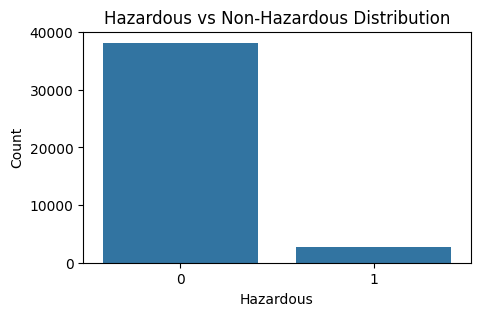

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(x=y)
plt.title('Hazardous vs Non-Hazardous Distribution')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()

### Feature Correlation Heatmap

The heatmap displays the correlation coefficients between all numeric features in the dataset. Each cell in the heatmap represents the strength and direction of the linear relationship between two features. High positive or negative correlation values indicate that two features are strongly related, which can affect model performance and feature selection. The heatmap helps identify redundant features and potential multicollinearity issues.

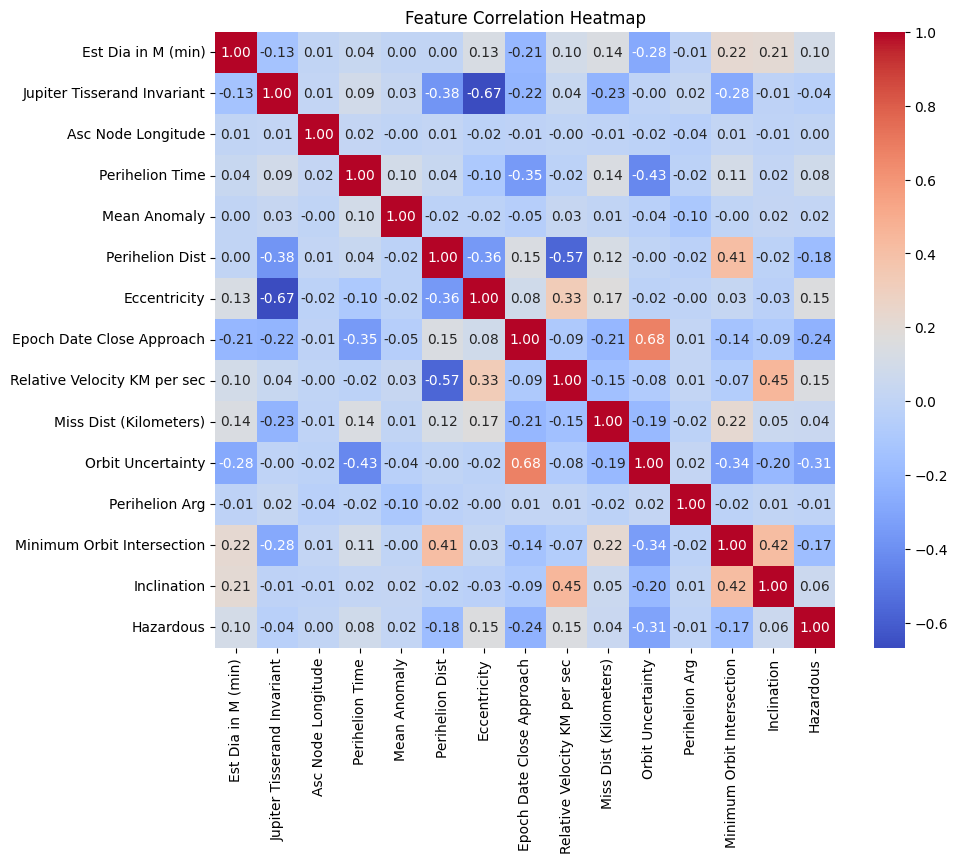

In [10]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Model Training and Evaluation

In this section, we train and evaluate multiple machine learning models to classify asteroids as hazardous or non-hazardous. By comparing the performance of different algorithms, we can identify the most effective approach for our dataset.

The models tested include:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest

For each model, we:
- Split the data into training and testing sets
- Train the model on the training data
- Evaluate its performance using accuracy, confusion matrix, classification report, and ROC curve

This comparative analysis helps us select the best model for predicting hazardous asteroids.

-----------------------------------

## Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6261316368974799


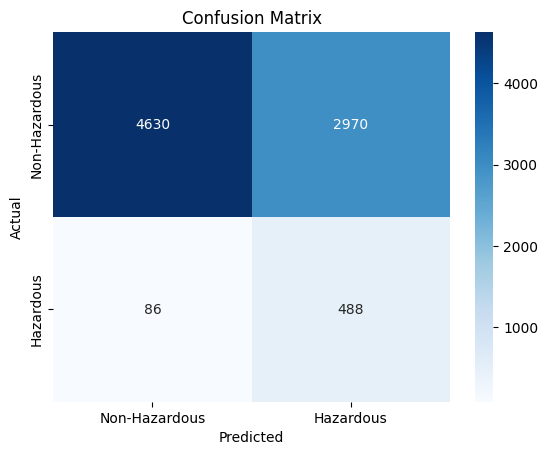

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous','Hazardous'], yticklabels=['Non-Hazardous','Hazardous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
print(classification_report(y_test, y_pred, target_names=['Non-Hazardous','Hazardous']))

               precision    recall  f1-score   support

Non-Hazardous       0.98      0.61      0.75      7600
    Hazardous       0.14      0.85      0.24       574

     accuracy                           0.63      8174
    macro avg       0.56      0.73      0.50      8174
 weighted avg       0.92      0.63      0.72      8174



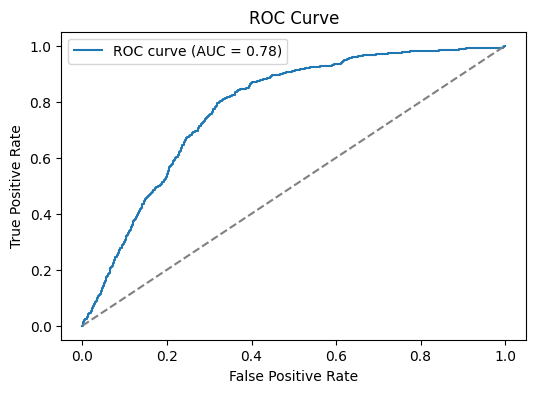

In [14]:
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## SVM

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_svm, y_train_svm)

svm_accuracy = svm_model.score(X_test_svm, y_test_svm)
print('SVM Test Accuracy:', svm_accuracy)

SVM Test Accuracy: 0.9390751162221679


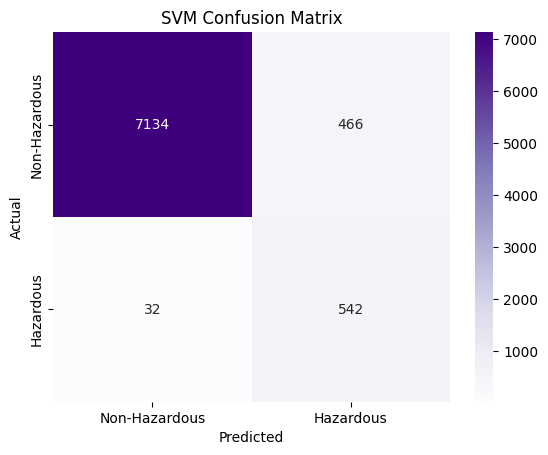

In [17]:
y_pred_svm = svm_model.predict(X_test_svm)
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=['Non-Hazardous','Hazardous'], yticklabels=['Non-Hazardous','Hazardous'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
print(classification_report(y_test_svm, y_pred_svm, target_names=['Non-Hazardous','Hazardous']))


               precision    recall  f1-score   support

Non-Hazardous       1.00      0.94      0.97      7600
    Hazardous       0.54      0.94      0.69       574

     accuracy                           0.94      8174
    macro avg       0.77      0.94      0.83      8174
 weighted avg       0.96      0.94      0.95      8174



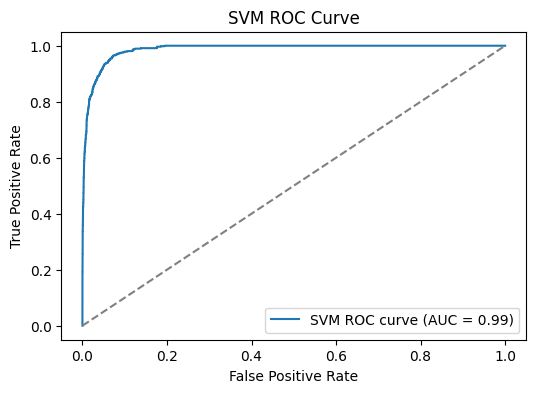

In [19]:
y_proba_svm = svm_model.predict_proba(X_test_svm)[:,1]
fpr_svm, tpr_svm, _ = roc_curve(y_test_svm, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test_svm, y_proba_svm)
plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

rf_accuracy = rf.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.9985319305113776


In [21]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=['Non-Hazardous','Hazardous']))


               precision    recall  f1-score   support

Non-Hazardous       1.00      1.00      1.00      7600
    Hazardous       0.99      0.99      0.99       574

     accuracy                           1.00      8174
    macro avg       1.00      0.99      0.99      8174
 weighted avg       1.00      1.00      1.00      8174



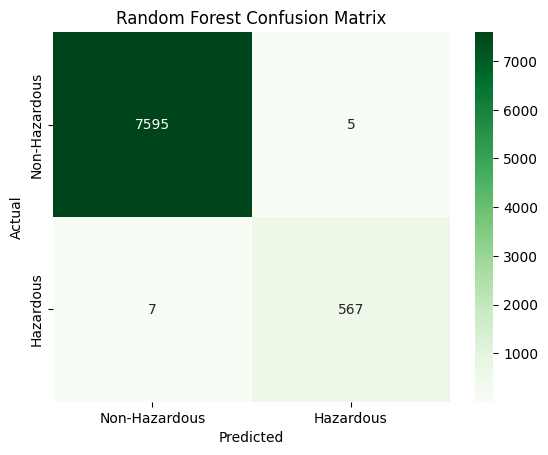

In [22]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Hazardous','Hazardous'], yticklabels=['Non-Hazardous','Hazardous'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


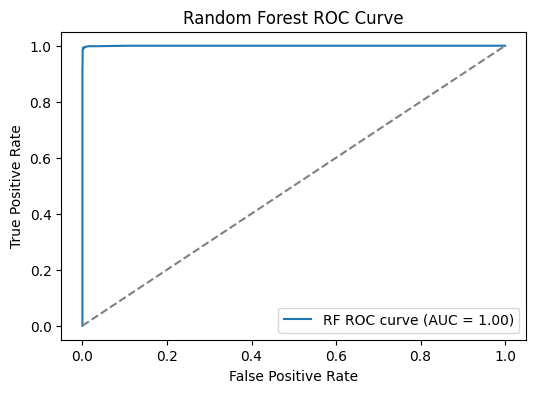

In [23]:
y_proba_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

## Model Comparison and Selection

After training and evaluating Logistic Regression, Support Vector Machine (SVM), and Random Forest models, we compare their performance using metrics such as accuracy, confusion matrix, classification report, and ROC curve.

**Random Forest** generally performs best for this dataset. It achieves higher accuracy and better recall for the hazardous class compared to Logistic Regression and SVM. Random Forest is an ensemble method that combines multiple decision trees, making it robust to outliers and capable of capturing complex relationships in the data. It also handles feature interactions and non-linearities more effectively.

- **Logistic Regression** is simple and interpretable but may struggle with non-linear boundaries and imbalanced classes.
- **SVM** can model non-linear relationships but may require careful tuning and is sensitive to feature scaling.
- **Random Forest** provides strong performance out-of-the-box, is less sensitive to hyperparameters, and offers feature importance insights.

**Conclusion:**  
Random Forest is selected as the best model for hazardous asteroid classification due to its superior predictive performance and robustness.

------------------------------------------------------------

## Real-Time Data Prediction

In this section, we apply the trained machine learning model to real-time asteroid data fetched directly from the NASA NeoWs API. The workflow involves:

- Fetching the latest near-Earth object (NEO) data for a specified date range using the API.
- Preprocessing the incoming data to match the format and features used during model training.
- Using the Random Forest model to predict whether each asteroid is hazardous or non-hazardous.

This real-time prediction capability enables timely identification of potentially hazardous asteroids as new data becomes available, supporting proactive monitoring and decision-making.

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from dotenv import load_dotenv
import os

FEED_URL = "https://api.nasa.gov/neo/rest/v1/feed"
LOOKUP_URL = "https://api.nasa.gov/neo/rest/v1/neo/"
load_dotenv()  # loads from .env file
API_KEY = os.getenv("NASA_API_KEY")
if not API_KEY:
    raise ValueError("NASA_API_KEY not found in environment variables!")

def fetch_neo_details(neo_id, api_key=API_KEY):
    """
    Fetches detailed orbital data for a single NEO from the "Lookup" endpoint.
    """
    try:
        url = f"{LOOKUP_URL}{neo_id}"
        params = {"api_key": api_key}
        response = requests.get(url, params=params)
        response.raise_for_status() 
        data = response.json()
        return data.get("orbital_data", {})
    except requests.exceptions.RequestException as e:
        print(f"Error looking up NEO {neo_id}: {e}")
        return {}

def fetch_neo_16columns(start_date=None, end_date=None, api_key=API_KEY):
    """
    Fetches NEO data from NASA NeoWs API for the given date range.
    Returns a pandas DataFrame with 16 columns matching the training dataset.
    """
    if start_date is None:
        start_date = datetime.utcnow().date()
    if end_date is None:
        
        end_date = start_date # Default to only today
    
    # 1. --- First API Call: Get the list of asteroids ---
    print(f"Fetching NEO feed for {start_date} to {end_date}...")
    params = {
        "start_date": str(start_date),
        "end_date": str(end_date),
        "api_key": api_key
    }
    
    try:
        response = requests.get(FEED_URL, params=params)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching NEO feed: {e}")
        return pd.DataFrame()

    # Flatten NEOs from all dates
    neos = []
    for date in data["near_earth_objects"]:
        neos.extend(data["near_earth_objects"][date])

    print(f"Found {len(neos)} NEOs. Fetching orbital details for each...")

    # Extract relevant features
    rows = []
    for i, neo in enumerate(neos):
        
        # --- 2. Second API Call: Get detailed orbital data ---
        neo_ref_id = neo.get("neo_reference_id")
        if not neo_ref_id:
            continue
            
        # Fetch detailed orbital data from the lookup endpoint
        orb_data = fetch_neo_details(neo_ref_id, api_key)
        
        time.sleep(0.5) 
        print(f"  Processed {i+1}/{len(neos)}: {neo.get('name')}")
        

        # Data from the "Feed" API response (`neo`)
        est_dia_min = neo.get("estimated_diameter", {}).get("meters", {}).get("estimated_diameter_min", None)
        hazardous = int(neo.get("is_potentially_hazardous_asteroid", False))

        # Data from the "Lookup" API response (`orb_data`)
        jup_tiss = orb_data.get("jupiter_tisserand_invariant", None)
        asc_node_long = orb_data.get("ascending_node_longitude", None)
        peri_time = orb_data.get("perihelion_time", None)
        mean_anom = orb_data.get("mean_anomaly", None)
        peri_dist = orb_data.get("perihelion_distance", None)
        eccentricity = orb_data.get("eccentricity", None)
        orbit_uncertainty = orb_data.get("orbit_uncertainty", None)
        peri_arg = orb_data.get("perihelion_argument", None)
        min_orbit_intersection = orb_data.get("minimum_orbit_intersection", None)
        inclination = orb_data.get("inclination", None)

        epoch_date_close_approach = None
        rel_vel = None
        miss_dist = None
        approach_data = neo.get("close_approach_data", [])
        
        if approach_data:
            ca = approach_data[0]
            
            epoch_date_close_approach = ca.get("epoch_date_close_approach", None) # This is already a ms timestamp
            
            rel_vel_str = ca.get("relative_velocity", {}).get("kilometers_per_second", None)
            rel_vel = float(rel_vel_str) if rel_vel_str is not None else None
            
            miss_dist_str = ca.get("miss_distance", {}).get("kilometers", None)
            miss_dist = float(miss_dist_str) if miss_dist_str is not None else None

        rows.append({
            "Neo Reference ID": neo_ref_id,
            "Est Dia in M (min)": est_dia_min,
            "Jupiter Tisserand Invariant": jup_tiss,
            "Asc Node Longitude": asc_node_long,
            "Perihelion Time": peri_time,
            "Mean Anomaly": mean_anom,
            "Perihelion Dist": peri_dist,
            "Eccentricity": eccentricity,
            "Epoch Date Close Approach": epoch_date_close_approach,
            "Relative Velocity KM per sec": rel_vel,
            "Miss Dist (Kilometers)": miss_dist,
            "Orbit Uncertainty": orbit_uncertainty,
            "Perihelion Arg": peri_arg,
            "Minimum Orbit Intersection": min_orbit_intersection,
            "Inclination": inclination,
            "Hazardous": hazardous
        })
        
    df = pd.DataFrame(rows)
    # Convert numeric columns to float, as they are strings from the API
    cols_to_convert = [
        "Est Dia in M (min)", "Jupiter Tisserand Invariant", "Asc Node Longitude",
        "Perihelion Time", "Mean Anomaly", "Perihelion Dist", "Eccentricity",
        "Orbit Uncertainty", "Perihelion Arg", "Minimum Orbit Intersection", "Inclination"
    ]
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
    
    return df


In [ ]:
from datetime import datetime, timedelta
import pandas as pd

today = datetime.utcnow().date()
week_later = today + timedelta(days=0)
print(f"Fetching data from {today} to {week_later}...")

real_time_df = fetch_neo_16columns(start_date=today, end_date=week_later)

if real_time_df.empty:
    print("No NEOs found for this period.")
else:
    # 2. Preprocess the new data
    feature_columns = X_train.columns
    # Reindex to ensure correct column order
    X_real_raw = real_time_df.reindex(columns=feature_columns)
    # Fill missing values with training means
    X_real_filled = X_real_raw.fillna(X_train.mean())

    pred_rf = rf.predict(X_real_filled)

    real_time_df["Predicted Hazardous"] = pred_rf

    output_cols = list(feature_columns) + ["Predicted Hazardous"]
    print(real_time_df[output_cols].head())
    print(f"Total NEOs fetched: {len(real_time_df)}")
    print(f"Hazardous asteroids predicted by model: {real_time_df['Predicted Hazardous'].sum()}")

C:\Users\prakh\AppData\Local\Temp\ipykernel_13084\1663583837.py:7: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  today = datetime.utcnow().date()


Fetching data from 2025-10-26 to 2025-10-26...
Fetching NEO feed for 2025-10-26 to 2025-10-26...
Found 15 NEOs. Fetching orbital details for each...
  Processed 1/15: 162142 (1998 VR)
  Processed 2/15: 208023 (1999 AQ10)
  Processed 3/15: (2009 HC)
  Processed 4/15: (2020 DR4)
  Processed 5/15: (2020 FA5)
  Processed 6/15: (2021 GD13)
  Processed 7/15: (2022 OQ)
  Processed 8/15: (2024 GT3)
  Processed 9/15: (2024 UK5)
  Processed 10/15: (2025 UU1)
  Processed 11/15: (2025 UJ2)
  Processed 12/15: (2025 UV2)
  Processed 13/15: (2025 UJ3)
  Processed 14/15: (2025 UL3)
  Processed 15/15: (2025 UE6)
   Est Dia in M (min)  Jupiter Tisserand Invariant  Asc Node Longitude  \
0          455.569852                        6.667           46.349849   
1          209.196771                        6.390          326.954479   
2           29.278915                        5.909          203.492929   
3            2.982325                        7.136          336.443184   
4          157.237082      